In [1]:
from src.utils import load_data

language = "python"
task = "retrieval"
settings = ["cross_file_first"]

cross_file_first = load_data(task=task, language=language, settings=settings)

/datadrive05/huypn16/anaconda3/envs/knn-llm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading data: 100%|██████████| 1/1 [00:05<00:00,  5.96s/it]


In [2]:
cross_file_first["train"]["hard"][0]

{'repo_name': 'MarekSuchanek/repocribro',
 'file_path': 'repocribro/ext_core.py',
 'context': ['class Extension:\n    """Generic **repocribro** extension class\n\n    It serves as base extension which does nothing but has prepared\n    all the attributes and methods needed. Particular real extensions\n    can override those attributes and methods to make so behavior\n    and extend repocribro. It also provides some useful methods to\n    those subclasses.\n\n\n    .. todo:: Consider loading/asking order not by priority but by\n              dependencies\n    """\n\n    #: Name of extension\n    NAME = \'unknown\'\n    #: Category of extension (basic, security, data, ...)\n    CATEGORY = \'\'\n    #: Author(s) of extension\n    AUTHOR = \'\'\n    #: Administration URL within site (best via url_for)\n    ADMIN_URL = None\n    #: Homepage url of extension (rtd, pocoo, ...)\n    HOME_URL = None\n    #: GitHub url of extension project\n    GH_URL = None\n    #: Priority (lower will be loade

In [3]:
def finding_context(contexts_files, relative_path):
    for file in contexts_files:
        if relative_path == file["relative_path"]:
            return file
    return None

In [4]:
from src.repo_graph.parse_source_code import parse_file, parse_source
contexts_files = parse_source("data/repobench/repos/OpenFermion-Cirq/", "data/repobench/repos_call_graphs/OpenFermion-Cirq.json")
file = finding_context(contexts_files, "openfermioncirq/variational/study_test.py")

In [5]:
file

{'relative_path': 'openfermioncirq/variational/study_test.py',
 'functions': [{'name': 'study_test.test_variational_study_circuit',
   'context': 'def test_variational_study_circuit():\n    assert (test_study.circuit.to_text_diagram().strip() == """\n0: ───X───X^theta0───@───X^theta0───M(\'all\')───\n                     │              │\n1: ───────X^theta1───@───X^theta1───M──────────\n""".strip())\n\n\ndef test_variational_study_num_params():\n    assert test_study.num_params == 2\n\n\ndef test',
   'edges': [],
   'type_edges': []},
  {'name': 'study_test.ional_study_optimize_and_extend_a',
   'context': 'def ional_study_optimize_and_extend_and_summary():\n    numpy.random.seed(63351',
   'edges': [],
   'type_edges': []},
  {'name': "study_test. study = VariationalStudy(\n            'study', test_a",
   'context': "def  study = VariationalStudy(\n            'study', test_ansatz, test_objective,\n            black_box_type=variational_black_box.UNITARY_SIMULATE_STATEFUL,\n        

In [6]:
file = finding_context(contexts_files, "openfermioncirq/optimization/result.py")

In [7]:
file

{'relative_path': 'openfermioncirq/optimization/result.py',
 'functions': [],
 'classes': [{'name': 'result.OptimizationResult',
   'methods': [{'name': 'result.OptimizationResult.__init__',
     'context': 'def __init__(self,\n                 optimal_value: float,\n                 optimal_parameters: numpy.ndarray,\n                 num_evaluations: Optional[int]=None,\n                 cost_spent: Optional[float]=None,\n                 function_values: Optional[List[Tuple[\n                     float, Optional[float], Optional[numpy.ndarray]\n                     ]]]=None,\n                 wait_times: Optional[List[float]]=None,\n                 time: Optional[int]=None,\n                 seed: Optional[int]=None,\n                 status: Optional[int]=None,\n                 message: Optional[str]=None) -> None:\n        self.optimal_value = optimal_value\n        self.optimal_parameters = optimal_parameters\n        self.num_evaluations = num_evaluations\n        self.cost_sp

In [8]:
import json
import os
created_names = [name.removesuffix(".json") for name in os.listdir("data/repobench/repos_call_graphs")]
non_empty_created_names = []
for created_name in created_names:
    with open(f"data/repobench/repos_call_graphs/{created_name}.json", "r") as f:
        data = json.load(f)
    if len(data) != 0:
        non_empty_created_names.append(created_name)
print(len(non_empty_created_names))

2399


[2023-10-05 02:26:58,281] [INFO] [real_accelerator.py:158:get_accelerator] Setting ds_accelerator to cuda (auto detect)


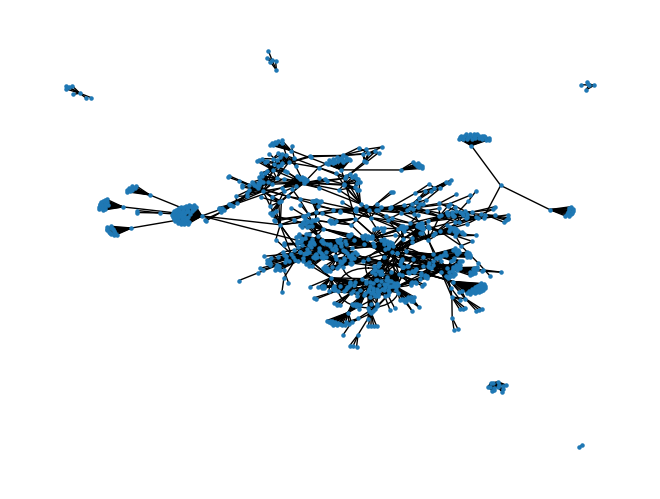

In [9]:
from src.repo_graph.repo_to_graph import load_contexts_then_embed, edge_dict_to_adjacency_tensor, visualize_graph
from src.repo_graph.parse_source_code import parse_source
contexts_files = parse_source("data/repobench/repos/OpenFermion-Cirq/", "data/repobench/repos_call_graphs/OpenFermion-Cirq.json")
embeddings, edges, type_, contexts, index_to_name, index_to_node_type = load_contexts_then_embed(contexts_files)
edge_tensor = edge_dict_to_adjacency_tensor(edges, len(embeddings))
visualize_graph(edge_tensor)

In [10]:
index_to_name[452]

'fermionic_simulation.py'

In [11]:
contexts[388]

'def a rotation around an axis in the XY plane in\n        each of three orthogonal 2-dimensional subspaces.\n\n        First, the following basis change is performed:\n            0000 ↦ 0001        0001 ↦ 1111\n            1111 ↦ 0010        1110 ↦ 1100\n                               0010 ↦ 0000\n            0110 ↦ 0101        1101 ↦ 0011\n            1001 ↦ 0110        0100 ↦ 0100\n            1010 ↦ 1001        1011 ↦ 0111\n            0101 ↦ 1010        1000 ↦ 1000\n            1100 ↦ 1101        0111 ↦ 1011\n            0011 ↦ 1110\n\n        Note that for each 2-dimensional subspace of interest, the first two\n        qubits are the same and the right two qubits are different. The desired\n        rotations thus can be effected by a complex-version of a partial SWAP\n        gate on the latter two qubits, controlled on the first two qubits. This\n        partial SWAP-like gate can  be decomposed such that it is parameterized\n        solely by a rotation in the ZY plane on the 

In [12]:
from src.utils import load_data
language = "python"
task = "retrieval"
cross_file_first_hard = load_data(task, language, "cross_file_first")["train"]["hard"]
cross_file_first_easy = load_data(task, language, "cross_file_first")["train"]["easy"]
cross_file_first = cross_file_first_hard + cross_file_first_easy


Loading data: 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]


In [13]:
from src.repo_graph.repo_to_graph import embed_code
from scripts.data.matching_repobench_graphs import get_all_samples_from_repo, get_gold_index, get_function_class_name, finding_gold_name_in_graph
import torch
from src.repo_graph.search_policy.knn_search import ProximitySearchRadius, ProximitySearchPattern
samples = get_all_samples_from_repo("OpenFermion-Cirq", cross_file_first)
retrieve_config = {
    "search_config": {
        "k": 8,
    },
    "expand_config": {
        "radius": 4,
        "max_size": 150
    }
}
# retrieve_config = {
#     "search_config": {
#         "k": 15,
#     },
#     "expand_config": {
#         "path_depth": 4
#     }
# }
_type_ = {k: edge_dict_to_adjacency_tensor(type_[k], len(embeddings)) for k in type_}
_type_ = torch.stack(list(_type_.values()), dim=0)
search = ProximitySearchRadius(
        embeddings=torch.concat(list(embeddings.values())),
        adj_matrix=edge_tensor,
        type_matrices=_type_,
        index_to_name=index_to_name,
        search_config=retrieve_config["search_config"],
        expand_config=retrieve_config["expand_config"],
        metric="cosine",
    )
for sample_idx, sample in enumerate(samples):
    returned_idx = []
    # embedding the preceeding code snippet as the query
    query_embedding = embed_code(sample["code"])   
    # KNN search
    expanded_indices, retrieved_graph, retrieved_edge_types, retrieved_embedding, translated_index_to_name, map_original_translated = search.retrieve(query_embedding)
    gold_index = get_gold_index(translated_index_to_name, sample["context"][sample["gold_snippet_index"]])
    gold_name = get_function_class_name(sample["context"][sample["gold_snippet_index"]])
    sample["gold_name"] = gold_name
    sample["searched_index_to_name"] = translated_index_to_name
    sample["gold_index"] = gold_index   
    sample["edge_tensor"] = retrieved_graph 
    sample["gold_name_in_graph"] = finding_gold_name_in_graph(gold_name, index_to_name)

Loading data:   0%|          | 0/1 [00:00<?, ?it/s]

Loading data: 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


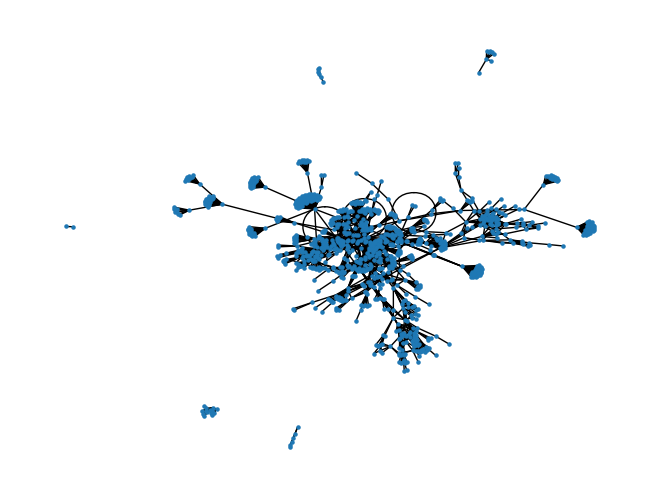

In [14]:
visualize_graph(edge_tensor)

torch.Size([196, 196])


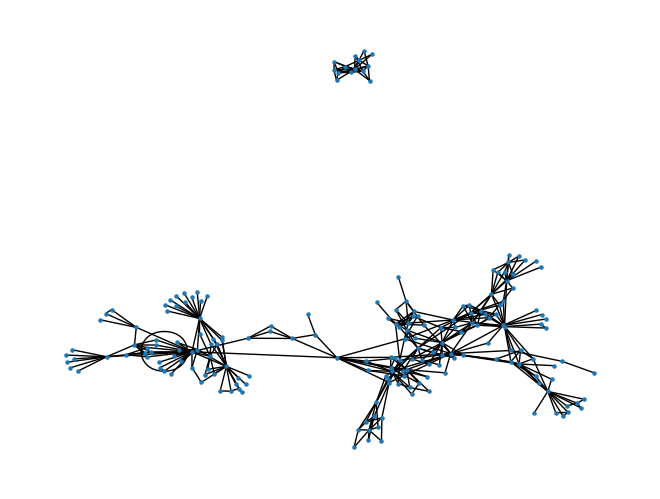

In [15]:
print(samples[0]["edge_tensor"].shape)
visualize_graph(samples[0]["edge_tensor"])

In [16]:
import torch
from src.models.GCN import SAGEReranker

In [ ]:
unix_scores = torch.matmul(torch.nn.functional.normalize(retrieved_embedding, dim=1), torch.nn.functional.normalize(input_batch.query.squeeze(0), dim=0)).float()

In [ ]:
retrieved_graph.shape

torch.Size([244, 244])

In [ ]:
unix_scores.shape

torch.Size([244])